In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)

In [3]:

model = keras.Sequential([
   
    keras.Input(shape=(28, 28, 1)),
    
    ## hidden layers
    layers.Conv2D(32, (3, 3), padding="valid", activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(20, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [4]:
model.compile(
    optimizer='Adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [5]:
h = model.fit(x = x_train, y = y_train, epochs=10, validation_split=0.3, batch_size=64)

Epoch 1/10
657/657 [==============================] - 7s 6ms/step - loss: 0.5953 - accuracy: 0.8740 - val_loss: 0.1501 - val_accuracy: 0.9543
Epoch 2/10
657/657 [==============================] - 3s 5ms/step - loss: 0.1228 - accuracy: 0.9622 - val_loss: 0.1166 - val_accuracy: 0.9658
Epoch 3/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0857 - accuracy: 0.9730 - val_loss: 0.1232 - val_accuracy: 0.9643
Epoch 4/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0675 - accuracy: 0.9793 - val_loss: 0.0858 - val_accuracy: 0.9746
Epoch 5/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0579 - accuracy: 0.9816 - val_loss: 0.1031 - val_accuracy: 0.9684
Epoch 6/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.0840 - val_accuracy: 0.9761
Epoch 7/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0924 - val_accuracy: 0.9732
Epoch 

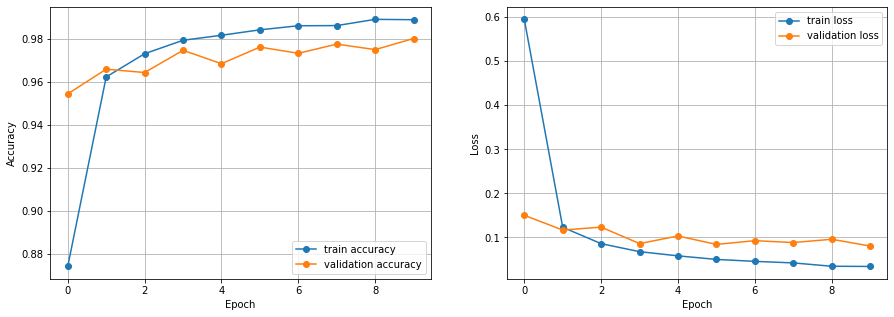

In [6]:


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

